In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [1]:
import sys
sys.executable

'/usr/local/opt/python/bin/python3.7'

In [2]:
from calculate_level_new import get_features_from_raw_text

In [21]:
import progressbar
import pandas as pd
import time 
import json
import numpy as np

In [4]:
def lower(text):
    lower_text = ''
    for word in text.split():
        w = word.lower()
        lower_text += w + ' '
    lower_text = lower_text.strip()
    return lower_text

with open('./texts/texts_lleo.json') as json_file:  
    text = []
    set_name = []
    data = json.load(json_file)
    for data_i in data:
        text.append(data_i['text'])
        set_name.append(data_i['name'])
text_level = pd.DataFrame(
    {'text': text,
     'set_name': set_name
    })
text_level['set_name'] = text_level['set_name'].apply(lower)
text_level.head()

,text,set_name
0,"""Tom!"" No answer.\n""TOM!"" No answer.\nThe old ...",the adventures of tom sawyer part 1
1,The summer evenings were long. Tom walked alon...,the adventures of tom sawyer part 1
2,Tom appeared in front of the house with paint ...,the adventures of tom sawyer part 1
3,Tom began to think of the pleasure planned for...,the adventures of tom sawyer part 1
4,Tom gave the brush to Ben and he painted the f...,the adventures of tom sawyer part 1


In [5]:
set_level_df = pd.read_csv("./texts/set_level.csv", sep = ",")
set_level_df['set'] = set_level_df['set'].apply(lower)
set_level_df.head()

,set,level
0,everyday life stories 1,Elementary
1,pocahontas,Elementary
2,robin hood,Elementary
3,the call of the wild,Elementary
4,around the world in eighty days,PreIntermediate


In [6]:
name_dict = pd.Series(set_level_df.level.values,index=set_level_df.set).to_dict()
level_interpret = {'Elementary':0, 'PreIntermediate':1, 'Intermediate':2, 'UpperIntermediate':3, 'Advanced':4}

In [7]:
def assign_level(name):
    if name in name_dict:
        return level_interpret[name_dict[name]]
    else:
        return None

text_level['level'] = text_level['set_name'].apply(assign_level)
text_level_no_nan = text_level.dropna()
text_level_no_nan.head()

,text,set_name,level
0,"""Tom!"" No answer.\n""TOM!"" No answer.\nThe old ...",the adventures of tom sawyer part 1,1.0
1,The summer evenings were long. Tom walked alon...,the adventures of tom sawyer part 1,1.0
2,Tom appeared in front of the house with paint ...,the adventures of tom sawyer part 1,1.0
3,Tom began to think of the pleasure planned for...,the adventures of tom sawyer part 1,1.0
4,Tom gave the brush to Ben and he painted the f...,the adventures of tom sawyer part 1,1.0


In [8]:
text_features = []
text_ind = 0
for text in text_level_no_nan['text']:
    bar = progressbar.ProgressBar(maxval=len(text_level_no_nan['text']),
                                  widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()
    
    txt_ft = get_features_from_raw_text(text)
    text_features.append(txt_ft)
    
    text_ind += 1
    bar.update(text_ind)
    time.sleep(0.1)

In [9]:
text_features[0]

[0.6666666666666666,
 0.26666666666666666,
 0.05277777777777778,
 0.013888888888888888,
 0.0,
 0.125,
 0.0,
 0.041666666666666664,
 0.08333333333333333,
 0.0,
 0.041666666666666664,
 0.0,
 0.0,
 0.5833333333333334,
 0.0,
 0.0,
 0.0,
 0.041666666666666664,
 0.0,
 0.041666666666666664,
 0.0,
 0.0,
 0.0,
 0.0,
 0.041666666666666664,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [13]:
len(text_features), len(text_level_no_nan['level'])

(3732, 3732)

In [14]:
data = pd.DataFrame(
    {'features': text_features,
     'level': text_level_no_nan['level'],
    })

In [15]:
data.head()

,features,level
0,"[0.6666666666666666, 0.26666666666666666, 0.05...",1.0
1,"[0.5833333333333334, 0.19166666666666668, 0.13...",1.0
2,"[0.5911764705882353, 0.25588235294117645, 0.07...",1.0
3,"[0.6242937853107344, 0.2231638418079096, 0.084...",1.0
4,"[0.6666666666666666, 0.14432989690721648, 0.07...",1.0


In [80]:
db = []
for line_index in range(len(data)):
    features_i = []
    x_d = data.iloc[line_index]['features']
    #print(x_d, type(x_d))
    y_d = data.iloc[line_index]['level']
    #print(y_d, type(y_d))
    features_i.extend(x_d)
    features_i.append(int(y_d))
    #print(features_i)
    db.append(features_i)

In [122]:
dp_arr = np.array(db)
X = dp_arr[:,:-1]
y = dp_arr[:,-1].reshape(-1, 1)


In [123]:
clf = LogisticRegressionCV(cv=5, random_state=0,
                           multi_class='multinomial',max_iter = 2000).fit(X, y)
#clf.predict(X[:2, :])

#clf.predict_proba(X[:2, :]).shape

clf.score(X, y) 

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5018756698821008

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [104]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train) 
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
y_pred = y_pred

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Confusion matrix, without normalization
[[  0   3  45   7   4]
 [  0  16  92  11  31]
 [  0   2 180  22  80]
 [  0   2 128  30 105]
 [  0   1  28   9 436]]
Normalized confusion matrix
[[0.   0.05 0.76 0.12 0.07]
 [0.   0.11 0.61 0.07 0.21]
 [0.   0.01 0.63 0.08 0.28]
 [0.   0.01 0.48 0.11 0.4 ]
 [0.   0.   0.06 0.02 0.92]]


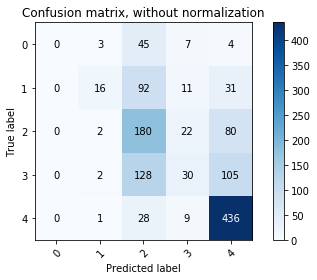

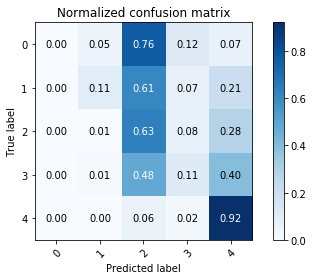

In [120]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

classes = [0,1,2,3,4]
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()